In [ ]:
# import pandas as pd

# # Data provided by the user

# # random seeds
# data_tuples = [(0.001, -1, 0, 1.0, 0.7630117259823082), (0.001, -1, 1, 1.0, 0.7983953918946719), (0.001, -1, 2, 0.2, 0.21147911952273196), (0.001, -1, 3, 1.0, 0.7673318247274223), (0.001, -1, 4, 1.0, 0.6689981485291092), (0.001, -1, 5, 0.92, 0.6352602345196462), (0.001, -1, 6, 0.92, 0.7006788726599465), (0.001, -1, 7, 0.96, 0.6235342522114791), (0.001, -1, 8, 1.0, 0.7911952273194816), (0.001, -1, 9, 1.0, 0.7691832956181855), (0.002, -1, 0, 0.98, 0.7389426044023863), (0.002, -1, 1, 0.92, 0.8025097716519235), (0.002, -1, 2, 0.92, 0.7726805184118494), (0.002, -1, 3, 0.98, 0.8222587944867311), (0.002, -1, 4, 1.0, 0.8249331413289447), (0.002, -1, 5, 0.96, 0.8356305286977989), (0.002, -1, 6, 0.94, 0.8072413083727628), (0.002, -1, 7, 0.98, 0.7905780703558939), (0.002, -1, 8, 0.4, 0.3371734211067682), (0.002, -1, 9, 0.86, 0.7802921209627649), (0.005, -1, 0, 0.9230769230769231, 0.8553795515326065), (0.005, -1, 1, 0.9307692307692308, 0.8253445793046699), (0.005, -1, 2, 0.8923076923076924, 0.8424192552972639), (0.005, -1, 3, 0.9, 0.8594939312898581), (0.005, -1, 4, 0.8923076923076924, 0.8568195844476445), (0.005, -1, 5, 0.8846153846153846, 0.8899403414935199), (0.005, -1, 6, 0.8692307692307693, 0.8173215387780293), (0.005, -1, 7, 0.9230769230769231, 0.8395391894671879), (0.005, -1, 8, 0.8923076923076924, 0.8424192552972639), (0.005, -1, 9, 0.8769230769230769, 0.8389220325036001), (0.01, -1, 0, 0.8769230769230769, 0.847767948981691), (0.01, -1, 1, 0.9192307692307692, 0.8592882123019955), (0.01, -1, 2, 0.8923076923076924, 0.8734828224645135), (0.01, -1, 3, 0.8692307692307693, 0.8681341287800864), (0.01, -1, 4, 0.2, 0.21147911952273196), (0.05, -1, 0, 0.8651515151515151, 0.8444764451758897), (0.05, -1, 1, 0.6772727272727272, 0.6918329561818556), (0.05, -1, 2, 0.8848484848484849, 0.8895289035177947), (0.05, -1, 3, 0.8931818181818182, 0.8994034149351985), (0.05, -1, 4, 0.9022727272727272, 0.8971405060687101), (0.1, -1, 0, 0.8858223062381853, 0.8897346225056573), (0.1, -1, 1, 0.8854442344045369, 0.8893231845299321), (0.1, -1, 2, 0.844234404536862, 0.8395391894671879), (0.1, -1, 3, 0.8374291115311909, 0.8284303641226085), (0.1, -1, 4, 0.8434782608695652, 0.8323390248919975), (0.3, -1, 0, 0.9193446754883428, 0.9146266200370294), (0.3, -1, 1, 0.9388783868935098, 0.934375642871837), (0.3, -1, 2, 0.9388783868935098, 0.934375642871837), (0.3, -1, 3, 0.9403906742281033, 0.9360213947747377), (0.3, -1, 4, 0.9388783868935098, 0.934375642871837), (0.5, -1, 0, 0.9552532123960695, 0.9533017897551944), (0.5, -1, 1, 0.954875283446712, 0.9545361036823699), (0.5, -1, 2, 0.9630385487528345, 0.9584447644517589), (0.8, -1, 0, 0.9723193197921587, 0.9689364328327504), (0.8, -1, 1, 0.9717052432687766, 0.971610779674964), (0.8, -1, 2, 0.9768068020784129, 0.9757251594322156), (1, -1, 0, 0.9815654044089408, 0.9825138860316808), (1, -1, 1, 0.977263998771027, 0.9771651923472536), (1, -1, 2, 0.983754512635379, 0.9798395391894672)]

# # fixed seed
# data_tuples= [(0.001, -1, 0, 1.0, 0.726393746142769), (0.001, -1, 1, 1.0, 0.726393746142769), (0.001, -1, 2, 1.0, 0.726393746142769), (0.001, -1, 3, 1.0, 0.726393746142769), (0.001, -1, 4, 1.0, 0.726393746142769), (0.001, -1, 5, 1.0, 0.726393746142769), (0.001, -1, 6, 1.0, 0.726393746142769), (0.001, -1, 7, 1.0, 0.726393746142769), (0.001, -1, 8, 1.0, 0.726393746142769), (0.001, -1, 9, 1.0, 0.726393746142769), (0.002, -1, 0, 0.96, 0.7714462044846739), (0.002, -1, 1, 0.96, 0.7714462044846739), (0.002, -1, 2, 0.96, 0.7714462044846739), (0.002, -1, 3, 0.96, 0.7714462044846739), (0.002, -1, 4, 0.96, 0.7714462044846739), (0.002, -1, 5, 0.96, 0.7714462044846739), (0.002, -1, 6, 0.96, 0.7714462044846739), (0.002, -1, 7, 0.96, 0.7714462044846739), (0.002, -1, 8, 0.96, 0.7714462044846739), (0.002, -1, 9, 0.96, 0.7714462044846739), (0.005, -1, 0, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 1, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 2, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 3, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 4, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 5, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 6, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 7, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 8, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 9, 0.8615384615384616, 0.8006583007611603), (0.01, -1, 0, 0.8615384615384616, 0.8490022629088665), (0.01, -1, 1, 0.8615384615384616, 0.8490022629088665), (0.01, -1, 2, 0.8615384615384616, 0.8490022629088665), (0.01, -1, 3, 0.8615384615384616, 0.8490022629088665), (0.01, -1, 4, 0.8615384615384616, 0.8490022629088665), (0.05, -1, 0, 0.8636363636363636, 0.8734828224645135), (0.05, -1, 1, 0.8636363636363636, 0.8734828224645135), (0.05, -1, 2, 0.8636363636363636, 0.8734828224645135), (0.05, -1, 3, 0.8636363636363636, 0.8734828224645135), (0.05, -1, 4, 0.8636363636363636, 0.8734828224645135), (0.1, -1, 0, 0.8555765595463138, 0.8629911540835219), (0.1, -1, 1, 0.8555765595463138, 0.8629911540835219), (0.1, -1, 2, 0.8555765595463138, 0.8629911540835219), (0.1, -1, 3, 0.8555765595463138, 0.8629911540835219), (0.1, -1, 4, 0.8555765595463138, 0.8629911540835219), (0.3, -1, 0, 0.9319470699432892, 0.9312898580538984), (0.3, -1, 1, 0.9319470699432892, 0.9312898580538984), (0.3, -1, 2, 0.9319470699432892, 0.9312898580538984), (0.3, -1, 3, 0.9319470699432892, 0.9312898580538984), (0.3, -1, 4, 0.9319470699432892, 0.9312898580538984), (0.5, -1, 0, 0.9661375661375662, 0.9724336556264144), (0.5, -1, 1, 0.9661375661375662, 0.9724336556264144), (0.5, -1, 2, 0.9661375661375662, 0.9724336556264144), (0.8, -1, 0, 0.9824752007557865, 0.9839539189467188), (0.8, -1, 1, 0.9824752007557865, 0.9839539189467188), (0.8, -1, 2, 0.9824752007557865, 0.9839539189467188), (1, -1, 0, 0.9865197019740379, 0.9866282657889324), (1, -1, 1, 0.9865197019740379, 0.9866282657889324), (1, -1, 2, 0.9865197019740379, 0.9866282657889324)]

# data_tuples= [(0.005, -1, 0, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 1, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 2, 0.8615384615384616, 0.8006583007611603), (0.005, -1, 0, 0.9230769230769231, 0.7977782349310841), (0.005, -1, 1, 0.2, 0.19707879037235138), (0.005, -1, 2, 0.9, 0.8675169718164987), (0.005, -1, 3, 0.8846153846153846, 0.8090927792635261), (0.005, -1, 4, 0.8923076923076924, 0.8420078173215387), (0.005, -1, 5, 0.9461538461538461, 0.8475622299938285), (0.005, -1, 6, 0.8461538461538461, 0.8125900020571899), (0.005, -1, 7, 0.8923076923076924, 0.7815264348899403), (0.005, -1, 8, 0.9, 0.8442707261880271), (0.005, -1, 9, 0.8846153846153846, 0.8399506274429129), (0.005, -1, 10, 0.8692307692307693, 0.8173215387780293), (0.005, -1, 11, 0.9384615384615385, 0.8584653363505451), (0.005, -1, 12, 0.9153846153846154, 0.8621682781320716), (0.005, -1, 13, 0.9307692307692308, 0.8512651717753549), (0.005, -1, 14, 0.8769230769230769, 0.8389220325036001), (0.005, -1, 15, 0.8769230769230769, 0.8383048755400123), (0.005, -1, 16, 0.9, 0.765068915860934), (0.005, -1, 17, 0.9230769230769231, 0.8158815058629911), (0.005, -1, 18, 0.8538461538461538, 0.8267846122197079), (0.005, -1, 19, 0.8538461538461538, 0.8078584653363505), (0.01, -1, 0, 0.8846153846153846, 0.8465336350545155), (0.01, -1, 1, 0.2076923076923077, 0.2028389220325036), (0.01, -1, 2, 0.9230769230769231, 0.8897346225056573), (0.01, -1, 3, 0.8615384615384616, 0.8341904957827607), (0.01, -1, 4, 0.3576923076923077, 0.3781114996914215), (0.01, -1, 5, 0.8961538461538462, 0.8638140300349723), (0.01, -1, 6, 0.8884615384615384, 0.8543509565932935), (0.01, -1, 7, 0.9076923076923077, 0.8549681135568813), (0.01, -1, 8, 0.8807692307692307, 0.8623739971199341), (0.01, -1, 9, 0.8961538461538462, 0.8496194198724543), (0.01, -1, 10, 0.8807692307692307, 0.8446821641637523), (0.01, -1, 11, 0.9153846153846154, 0.8572310224233697), (0.01, -1, 12, 0.9115384615384615, 0.8751285743674141), (0.01, -1, 13, 0.9076923076923077, 0.8479736679695535), (0.01, -1, 14, 0.8769230769230769, 0.847767948981691), (0.01, -1, 15, 0.8, 0.7979839539189467), (0.01, -1, 16, 0.8576923076923076, 0.8294589590619215), (0.01, -1, 17, 0.9192307692307692, 0.8592882123019955), (0.01, -1, 18, 0.8846153846153846, 0.8574367414112323), (0.01, -1, 19, 0.8461538461538461, 0.8199958856202427)]

# data_tuples = [(0.005, -1, 0, 0.7538461538461538, 0.7208393334704793), (0.005, -1, 1, 0.8846153846153846, 0.8286360831104711), (0.005, -1, 2, 0.8538461538461538, 0.8387163135157375), (0.005, -1, 3, 0.45384615384615384, 0.3632997325653158), (0.005, -1, 4, 0.9076923076923077, 0.8364534046492491), (0.005, -1, 5, 0.8692307692307693, 0.8261674552561201), (0.005, -1, 6, 0.8846153846153846, 0.8539395186175684), (0.005, -1, 7, 0.8846153846153846, 0.8420078173215387), (0.005, -1, 8, 0.8307692307692308, 0.8191730096687925), (0.005, -1, 9, 0.8692307692307693, 0.8216416375231433), (0.005, -1, 10, 0.8923076923076924, 0.8652540629500103), (0.005, -1, 11, 0.8923076923076924, 0.8784200781732154), (0.005, -1, 12, 0.8692307692307693, 0.8706027566344373), (0.005, -1, 13, 0.9230769230769231, 0.8502365768360419), (0.005, -1, 14, 0.9230769230769231, 0.8512651717753549), (0.005, -1, 15, 0.8769230769230769, 0.8261674552561201), (0.005, -1, 16, 0.9, 0.8656655009257355), (0.005, -1, 17, 0.9153846153846154, 0.8611396831927587), (0.005, -1, 18, 0.8923076923076924, 0.8543509565932935), (0.005, -1, 19, 0.8538461538461538, 0.8718370705616129), (0.01, -1, 0, 0.8769230769230769, 0.8564081464719193), (0.01, -1, 1, 0.7384615384615385, 0.7029417815264349), (0.01, -1, 2, 0.8538461538461538, 0.8401563464307755), (0.01, -1, 3, 0.8615384615384616, 0.8308989919769595), (0.01, -1, 4, 0.8923076923076924, 0.8617568401563465), (0.01, -1, 5, 0.8769230769230769, 0.8520880477268051), (0.01, -1, 6, 0.8923076923076924, 0.8732771034766509), (0.01, -1, 7, 0.8769230769230769, 0.8724542275252005), (0.01, -1, 8, 0.8538461538461538, 0.8568195844476445), (0.01, -1, 9, 0.8769230769230769, 0.8531166426661181), (0.01, -1, 10, 0.9038461538461539, 0.8919975313721457), (0.01, -1, 11, 0.8807692307692307, 0.8549681135568813), (0.01, -1, 12, 0.8538461538461538, 0.8640197490228348), (0.01, -1, 13, 0.8923076923076924, 0.8782143591853528), (0.01, -1, 14, 0.9076923076923077, 0.8695741616951245), (0.01, -1, 15, 0.8884615384615384, 0.8529109236782555), (0.01, -1, 16, 0.8923076923076924, 0.8763628882945896), (0.01, -1, 17, 0.9230769230769231, 0.8893231845299321), (0.01, -1, 18, 0.8884615384615384, 0.8617568401563465), (0.01, -1, 19, 0.8961538461538462, 0.872248508537338)]
# # Define column names
# columns = ['Percentage', 'Cut Point', 'Trial', 'Train Accuracy', 'Test Accuracy']

# # Create DataFrame
# df = pd.DataFrame(data_tuples, columns=columns)

# # Calculate mean and standard deviation for test accuracies
# # Assuming that the provided data has a pattern where every three tuples belong to the same
# # percentage and cut point but different trials
# df['Mean Train Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Train Accuracy'].transform('mean')
# df['Median Train Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Train Accuracy'].transform('median')
# df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
# df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')
# df['Max Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('max')
# df['Max Train Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Train Accuracy'].transform('max')


# # Now we display the DataFrame, though for brevity I'm only showing the first few rows here.
# df.head()


In [5]:
import pandas as pd

# Assuming 'data_dicts' is your list of dictionaries
data_dicts = [{'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 1.0, 'test_acc': 0.7395597613659741}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 1.0, 'test_acc': 0.7377082904752109}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 1.0, 'test_acc': 0.7683604196667353}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 3, 'train_acc': 1.0, 'test_acc': 0.768977576630323}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 4, 'train_acc': 1.0, 'test_acc': 0.7603373791400946}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 5, 'train_acc': 1.0, 'test_acc': 0.7080847562229994}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 6, 'train_acc': 1.0, 'test_acc': 0.7669203867516972}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 7, 'train_acc': 1.0, 'test_acc': 0.7307138448878832}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 8, 'train_acc': 1.0, 'test_acc': 0.7903723513680313}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 9, 'train_acc': 1.0, 'test_acc': 0.714667763834602}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 1.0, 'test_acc': 0.7833779057807035}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 1.0, 'test_acc': 0.7628060069944456}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 1.0, 'test_acc': 0.7953096070767331}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 3, 'train_acc': 1.0, 'test_acc': 0.8082699033120757}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 4, 'train_acc': 1.0, 'test_acc': 0.8323390248919975}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 5, 'train_acc': 1.0, 'test_acc': 0.7549886854556676}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 6, 'train_acc': 1.0, 'test_acc': 0.8020983336761983}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 7, 'train_acc': 1.0, 'test_acc': 0.7936638551738325}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 8, 'train_acc': 0.98, 'test_acc': 0.8251388603168073}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 9, 'train_acc': 0.9, 'test_acc': 0.6928615511211684}, {'lr': 0.001, 'sampled_percentage': 0.005, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 0.9615384615384616, 'test_acc': 0.8701913186587122}, {'lr': 0.001, 'sampled_percentage': 0.005, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 1.0, 'test_acc': 0.8763628882945896}, {'lr': 0.001, 'sampled_percentage': 0.005, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 0.8615384615384616, 'test_acc': 0.8471507920181033}, {'lr': 0.001, 'sampled_percentage': 0.005, 'sampled_cut_point': -1, 'repeat': 3, 'train_acc': 0.9615384615384616, 'test_acc': 0.8813001440032915}, {'lr': 0.001, 'sampled_percentage': 0.005, 'sampled_cut_point': -1, 'repeat': 4, 'train_acc': 1.0, 'test_acc': 0.8823287389426044}, {'lr': 0.001, 'sampled_percentage': 0.005, 'sampled_cut_point': -1, 'repeat': 5, 'train_acc': 0.9923076923076923, 'test_acc': 0.8808887060275663}, {'lr': 0.001, 'sampled_percentage': 0.005, 'sampled_cut_point': -1, 'repeat': 6, 'train_acc': 1.0, 'test_acc': 0.8718370705616129}, {'lr': 0.001, 'sampled_percentage': 0.005, 'sampled_cut_point': -1, 'repeat': 7, 'train_acc': 0.9923076923076923, 'test_acc': 0.8763628882945896}, {'lr': 0.001, 'sampled_percentage': 0.005, 'sampled_cut_point': -1, 'repeat': 8, 'train_acc': 0.8846153846153846, 'test_acc': 0.8701913186587122}, {'lr': 0.001, 'sampled_percentage': 0.005, 'sampled_cut_point': -1, 'repeat': 9, 'train_acc': 0.9769230769230769, 'test_acc': 0.8755400123431393}, {'lr': 0.001, 'sampled_percentage': 0.01, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 0.9615384615384616, 'test_acc': 0.9063978605225262}, {'lr': 0.001, 'sampled_percentage': 0.01, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 0.9961538461538462, 'test_acc': 0.900637728862374}, {'lr': 0.001, 'sampled_percentage': 0.01, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 0.9538461538461539, 'test_acc': 0.9066035795103888}, {'lr': 0.001, 'sampled_percentage': 0.01, 'sampled_cut_point': -1, 'repeat': 3, 'train_acc': 0.9807692307692307, 'test_acc': 0.8977576630322979}, {'lr': 0.001, 'sampled_percentage': 0.01, 'sampled_cut_point': -1, 'repeat': 4, 'train_acc': 0.9923076923076923, 'test_acc': 0.8998148529109237}, {'lr': 0.001, 'sampled_percentage': 0.01, 'sampled_cut_point': -1, 'repeat': 5, 'train_acc': 0.9807692307692307, 'test_acc': 0.9096893643283275}, {'lr': 0.001, 'sampled_percentage': 0.01, 'sampled_cut_point': -1, 'repeat': 6, 'train_acc': 0.3769230769230769, 'test_acc': 0.3497222793663855}, {'lr': 0.001, 'sampled_percentage': 0.01, 'sampled_cut_point': -1, 'repeat': 7, 'train_acc': 0.9730769230769231, 'test_acc': 0.9074264554618391}, {'lr': 0.001, 'sampled_percentage': 0.01, 'sampled_cut_point': -1, 'repeat': 8, 'train_acc': 0.9692307692307692, 'test_acc': 0.8987862579716108}, {'lr': 0.001, 'sampled_percentage': 0.01, 'sampled_cut_point': -1, 'repeat': 9, 'train_acc': 0.9692307692307692, 'test_acc': 0.8998148529109237}, {'lr': 0.001, 'sampled_percentage': 0.05, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 0.9272727272727272, 'test_acc': 0.9150380580127546}, {'lr': 0.001, 'sampled_percentage': 0.05, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 0.9477272727272728, 'test_acc': 0.9300555441267229}, {'lr': 0.001, 'sampled_percentage': 0.05, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 0.928030303030303, 'test_acc': 0.9193581567578688}, {'lr': 0.001, 'sampled_percentage': 0.05, 'sampled_cut_point': -1, 'repeat': 3, 'train_acc': 0.9363636363636364, 'test_acc': 0.9255297263937461}, {'lr': 0.001, 'sampled_percentage': 0.05, 'sampled_cut_point': -1, 'repeat': 4, 'train_acc': 0.943939393939394, 'test_acc': 0.9249125694301584}, {'lr': 0.001, 'sampled_percentage': 0.1, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 0.9255198487712666, 'test_acc': 0.9197695947335939}, {'lr': 0.001, 'sampled_percentage': 0.1, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 0.9417769376181474, 'test_acc': 0.9331413289446616}, {'lr': 0.001, 'sampled_percentage': 0.1, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 0.924007561436673, 'test_acc': 0.9193581567578688}, {'lr': 0.001, 'sampled_percentage': 0.1, 'sampled_cut_point': -1, 'repeat': 3, 'train_acc': 0.9285444234404537, 'test_acc': 0.9191524377700062}, {'lr': 0.001, 'sampled_percentage': 0.1, 'sampled_cut_point': -1, 'repeat': 4, 'train_acc': 0.9402646502835539, 'test_acc': 0.9288212301995474}, {'lr': 0.001, 'sampled_percentage': 0.3, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 0.9624448645242596, 'test_acc': 0.9547418226702324}, {'lr': 0.001, 'sampled_percentage': 0.3, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 0.9648393194706995, 'test_acc': 0.9582390454638963}, {'lr': 0.001, 'sampled_percentage': 0.3, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 0.9603024574669187, 'test_acc': 0.9555646986216828}, {'lr': 0.001, 'sampled_percentage': 0.3, 'sampled_cut_point': -1, 'repeat': 3, 'train_acc': 0.9638311279143037, 'test_acc': 0.9576218885003086}, {'lr': 0.001, 'sampled_percentage': 0.3, 'sampled_cut_point': -1, 'repeat': 4, 'train_acc': 0.9608065532451165, 'test_acc': 0.9545361036823699}, {'lr': 0.001, 'sampled_percentage': 0.5, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 0.981103552532124, 'test_acc': 0.9790166632380168}, {'lr': 0.001, 'sampled_percentage': 0.5, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 0.9820861678004535, 'test_acc': 0.9831310429952684}, {'lr': 0.001, 'sampled_percentage': 0.5, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 0.9781557067271353, 'test_acc': 0.9786052252622917}, {'lr': 0.001, 'sampled_percentage': 0.8, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 0.9826169107227208, 'test_acc': 0.9812795721045052}, {'lr': 0.001, 'sampled_percentage': 0.8, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 0.9888993859234766, 'test_acc': 0.9864225468010698}, {'lr': 0.001, 'sampled_percentage': 0.8, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 0.987954652810581, 'test_acc': 0.9860111088253446}, {'lr': 0.001, 'sampled_percentage': 1, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 0.9877486750134419, 'test_acc': 0.9849825138860316}, {'lr': 0.001, 'sampled_percentage': 1, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 0.991666026576542, 'test_acc': 0.9884797366796956}, {'lr': 0.001, 'sampled_percentage': 1, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 0.9905138643521008, 'test_acc': 0.9876568607282452}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 1.0, 'test_acc': 0.7395597613659741}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 1.0, 'test_acc': 0.7377082904752109}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 1.0, 'test_acc': 0.7683604196667353}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 3, 'train_acc': 1.0, 'test_acc': 0.768977576630323}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 4, 'train_acc': 1.0, 'test_acc': 0.7603373791400946}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 5, 'train_acc': 1.0, 'test_acc': 0.7080847562229994}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 6, 'train_acc': 1.0, 'test_acc': 0.7669203867516972}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 7, 'train_acc': 1.0, 'test_acc': 0.7307138448878832}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 8, 'train_acc': 1.0, 'test_acc': 0.7903723513680313}, {'lr': 0.001, 'sampled_percentage': 0.001, 'sampled_cut_point': -1, 'repeat': 9, 'train_acc': 1.0, 'test_acc': 0.714667763834602}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 0, 'train_acc': 1.0, 'test_acc': 0.7833779057807035}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 1, 'train_acc': 1.0, 'test_acc': 0.7628060069944456}, {'lr': 0.001, 'sampled_percentage': 0.002, 'sampled_cut_point': -1, 'repeat': 2, 'train_acc': 1.0, 'test_acc': 0.7953096070767331}]


# Create DataFrame from the list of dictionaries
df = pd.DataFrame(data_dicts)

# Calculate mean, median, and max for train and test accuracies
df['Mean Train Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['train_acc'].transform('mean')
df['Median Train Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['train_acc'].transform('median')
df['Mean Test Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['test_acc'].transform('mean')
df['Median Test Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['test_acc'].transform('median')
df['Max Test Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['test_acc'].transform('max')
df['Max Train Accuracy'] = df.groupby(['lr', 'sampled_percentage', 'sampled_cut_point'])['train_acc'].transform('max')

# Rename the columns to match the specified names
df.rename(columns={
    'lr': 'learning rate',
    'sampled_percentage': 'Percentage',
    'sampled_cut_point': 'Cut Point',
    'repeat': 'Trial',
    'train_acc': 'Train Accuracy',
    'test_acc': 'Test Accuracy'
}, inplace=True)

# Display the DataFrame (showing the first few rows for brevity)
df.head()


,learning rate,Percentage,Cut Point,Trial,Train Accuracy,Test Accuracy,Mean Train Accuracy,Median Train Accuracy,Mean Test Accuracy,Median Test Accuracy,Max Test Accuracy,Max Train Accuracy
0,0.001,0.001,-1,0,1.0,0.739560,1.0,1.0,0.74857,0.749949,0.790372,1.0
1,0.001,0.001,-1,1,1.0,0.737708,1.0,1.0,0.74857,0.749949,0.790372,1.0
2,0.001,0.001,-1,2,1.0,0.768360,1.0,1.0,0.74857,0.749949,0.790372,1.0
3,0.001,0.001,-1,3,1.0,0.768978,1.0,1.0,0.74857,0.749949,0.790372,1.0
4,0.001,0.001,-1,4,1.0,0.760337,1.0,1.0,0.74857,0.749949,0.790372,1.0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create grid values
xi = np.linspace(df['Percentage'].min(), df['Percentage'].max(), 100)
yi = np.linspace(df['Cut Point'].min(), df['Cut Point'].max(), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate
zi = griddata((df['Percentage'], df['Cut Point']), df['Mean Test Accuracy'], (xi, yi), method='cubic')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xi, yi, zi, cmap='viridis')
ax.set_xlabel('Percentage')
ax.set_ylabel('Cut Point')
ax.set_zlabel('Mean Test Accuracy')
plt.show()

QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull d Qbb Qc Qt Qz Q12
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 856488918  delaunay  Qbbound-last  Qcoplanar-keep  Qtriangulate
  Qz-infinity-point  Q12-allow-wide  _pre-merge  _zero-centrum  Qinterior-keep
  Pgood  _max-width  1  Error-roundoff 1.4e-15  _one-merge 9.7e-15
  Visible-distance 2.8e-15  U-max-coplanar 2.8e-15  Width-outside 5.5e-15
  _wide-facet 1.7e-14  _maxoutside 1.1e-14

precision problems (corrected unless 'Q0' or an error)
      2 degenerate hyperplanes recomputed with gaussian elimination
      2 nearly singular or axis-parallel hyperplanes
      2 zero divisors during back substitute
      2 zero divisors during gaussian elimination

The input to qhull appears to be less than 3 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p1(v4): 0.001    -1 3.8e-17
- p77(v3):  0.12    -1     1
- p61(v2):     1    -1  0.83
- p0(v1): 0.001    -1 3.8e-17

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 1.4e-15.  The center point, facets and distances
to the center point are as follows:

center point   0.2808       -1   0.4583

facet p77 p61 p0 distance=    0
facet p1 p61 p0 distance=    0
facet p1 p77 p0 distance=    0
facet p1 p77 p61 distance=    0

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:     0.001         1  difference= 0.999
  1:        -1  -2.225e-308  difference=    1
  2:  3.753e-17         1  difference=    1

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 1.4e-15.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


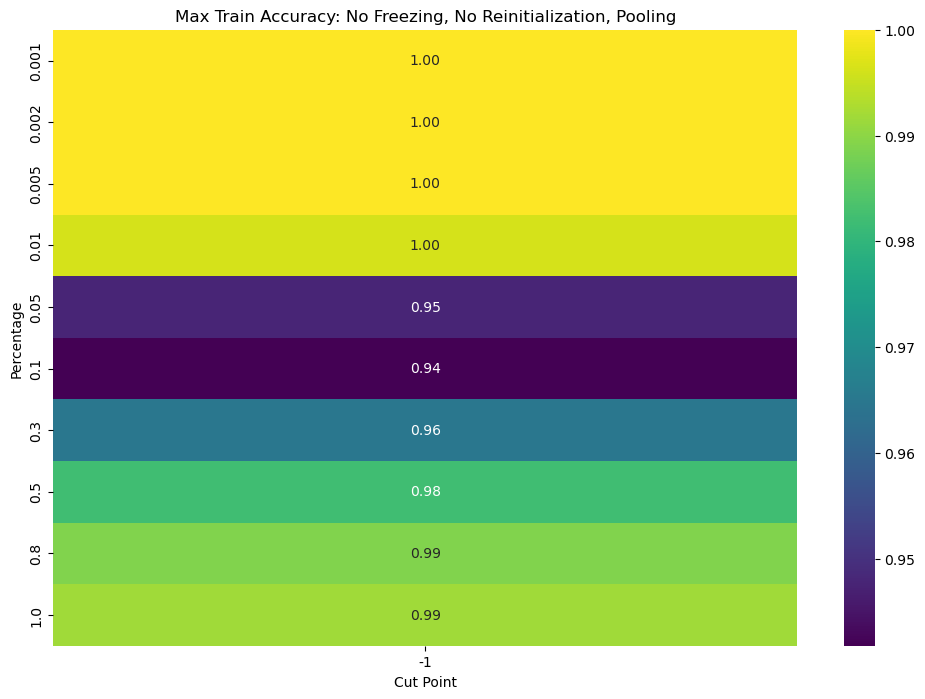

In [7]:
# For the heatmap, we will use the mean test accuracy, aggregated over trials for each combination of 'Percentage' and 'Cut Point'

# We will pivot the dataframe to get the mean test accuracy for each combination of 'Percentage' and 'Cut Point'
heatmap_data = df.pivot_table(index='Percentage', columns='Cut Point', values='Max Train Accuracy', aggfunc='max')

# Generating the heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Max Train Accuracy: No Freezing, No Reinitialization, Pooling')
plt.xlabel('Cut Point')
plt.ylabel('Percentage')
plt.show()


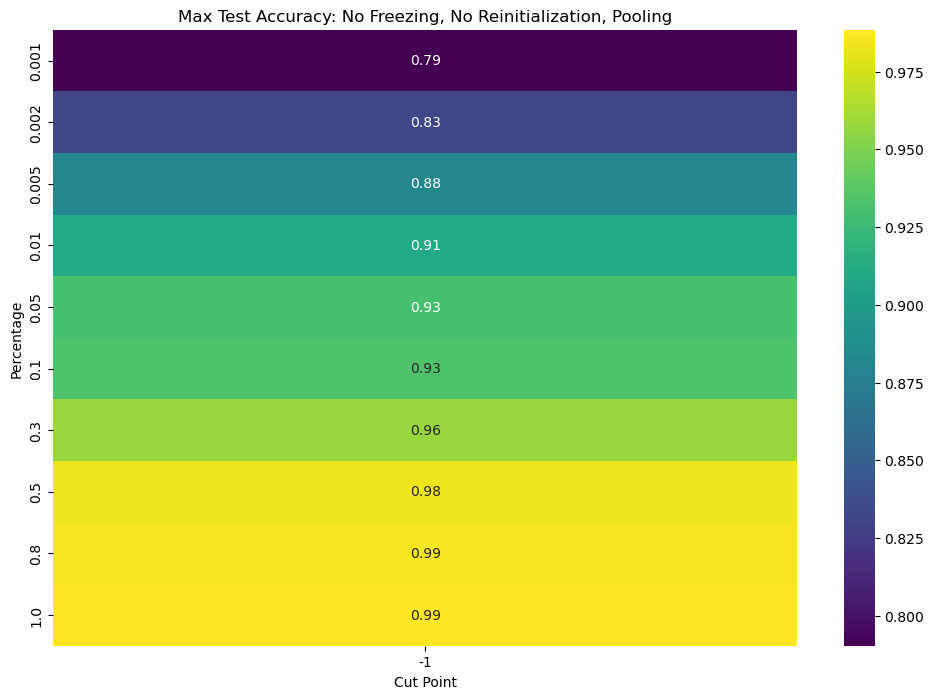

In [8]:
# For the heatmap, we will use the mean test accuracy, aggregated over trials for each combination of 'Percentage' and 'Cut Point'

# We will pivot the dataframe to get the mean test accuracy for each combination of 'Percentage' and 'Cut Point'
heatmap_data = df.pivot_table(index='Percentage', columns='Cut Point', values='Max Test Accuracy', aggfunc='max')

# Generating the heatmap using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Max Test Accuracy: No Freezing, No Reinitialization, Pooling')
plt.xlabel('Cut Point')
plt.ylabel('Percentage')
plt.show()


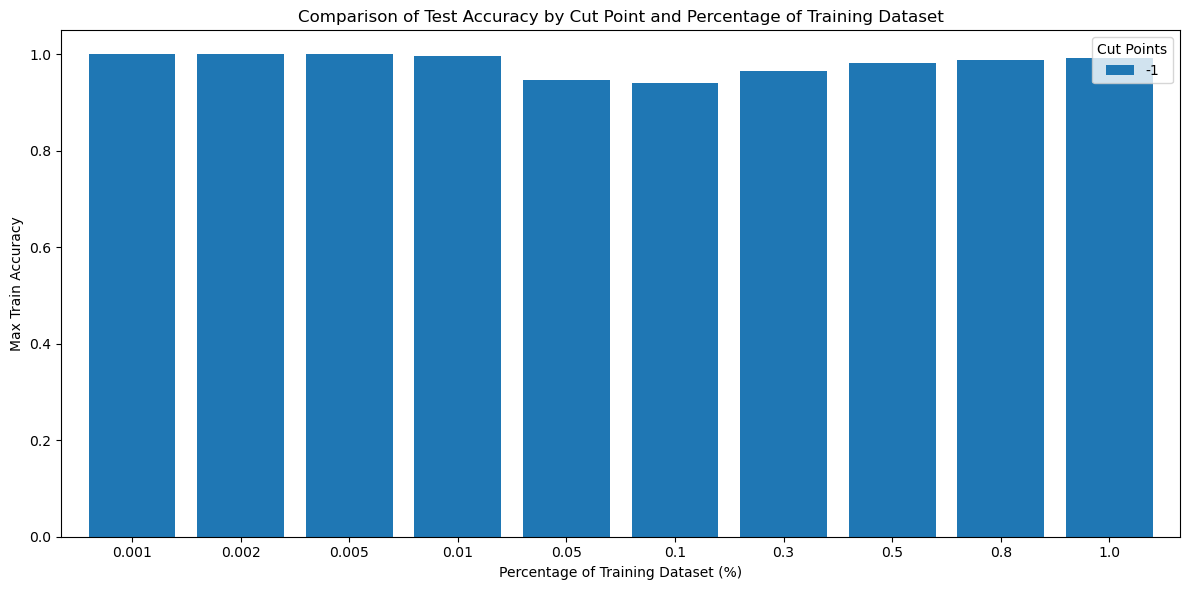

In [12]:
# Create a bar graph for comparing the test accuracies of different cut points at each percentage level.

# Find the mean test accuracy for each cut point at each percentage level.
mean_accuracies = df.groupby(['Cut Point', 'Percentage']).mean()['Max Train Accuracy'].unstack(0)

# Plotting
mean_accuracies.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Comparison of Test Accuracy by Cut Point and Percentage of Training Dataset')
plt.xlabel('Percentage of Training Dataset (%)')
plt.ylabel('Max Train Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally.
plt.legend(title='Cut Points')
plt.tight_layout()
plt.show()


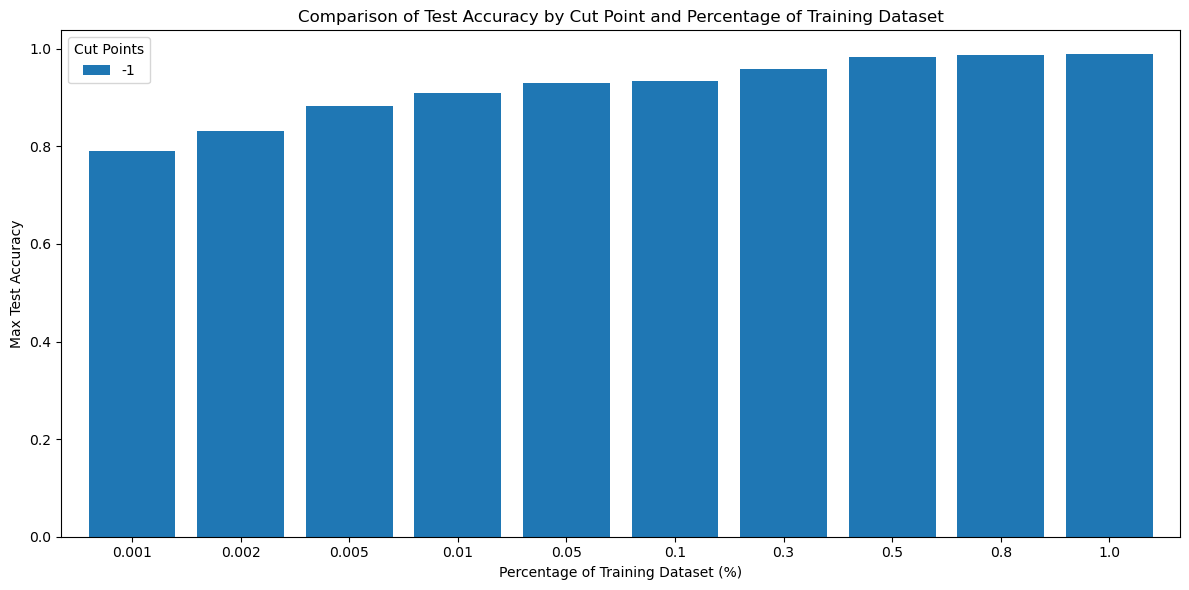

In [13]:
# Create a bar graph for comparing the test accuracies of different cut points at each percentage level.

# Find the mean test accuracy for each cut point at each percentage level.
mean_accuracies = df.groupby(['Cut Point', 'Percentage']).mean()['Max Test Accuracy'].unstack(0)

# Plotting
mean_accuracies.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.title('Comparison of Test Accuracy by Cut Point and Percentage of Training Dataset')
plt.xlabel('Percentage of Training Dataset (%)')
plt.ylabel('Max Test Accuracy')
plt.xticks(rotation=0)  # Rotate x-axis labels to show them horizontally.
plt.legend(title='Cut Points')
plt.tight_layout()
plt.show()


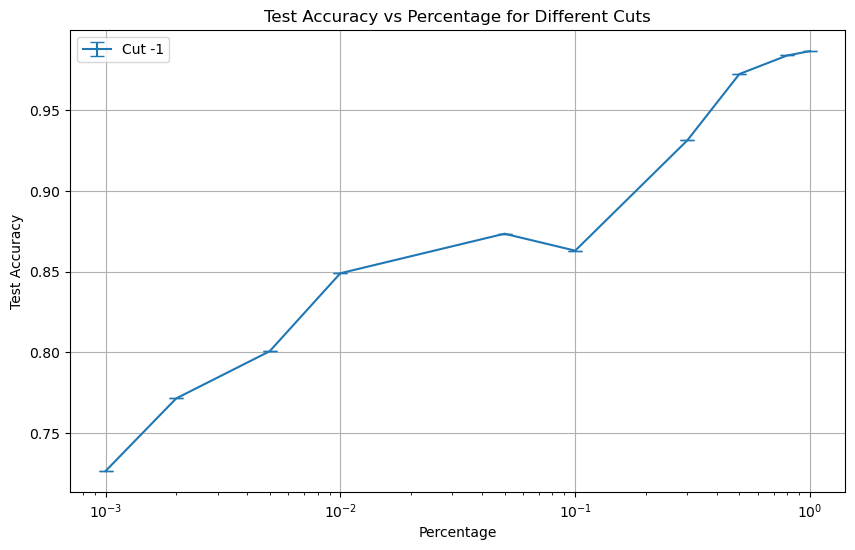

In [27]:
# Calculate mean and standard deviation for test accuracies
# Assuming that the provided data has a pattern where every three tuples belong to the same
# percentage and cut point but different trials
df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
df['Std Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('std')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate mean and standard deviation for each percentage
    means = cut_df.groupby('Percentage')['Mean Test Accuracy'].mean()
    stds = cut_df.groupby('Percentage')['Std Test Accuracy'].mean()

    # Plot with error bars for uncertainty
    plt.errorbar(means.index, means, yerr=stds, capsize=5, label=f'Cut {cut_point}')
    #plt.errorbar(means.index, means, capsize=5, label=f'Cut {cut_point}')


plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage for Different Cuts')
plt.legend()
#x log
plt.xscale('log')
plt.grid(True)
plt.show()

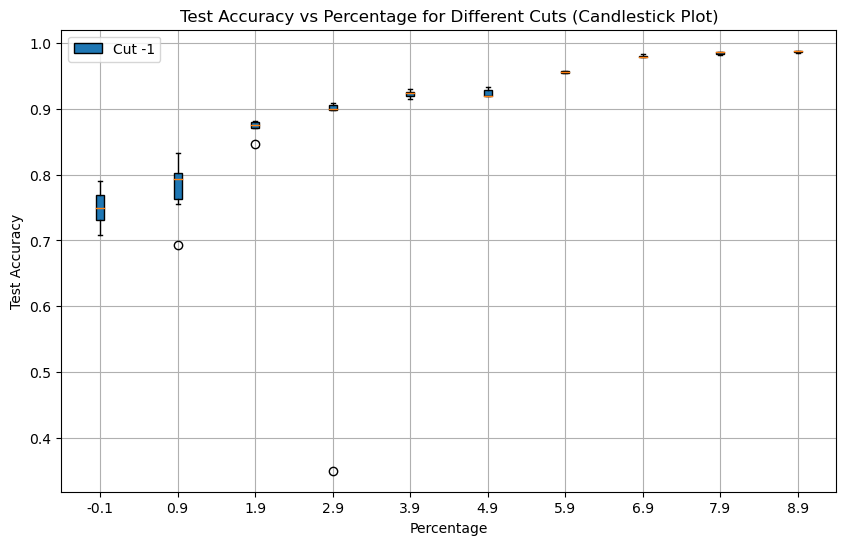

In [11]:

import numpy as np


# # Define column names
# columns = ['Percentage', 'Cut Point', 'Trial', 'Train Accuracy', 'Test Accuracy']

# # Create DataFrame
# df = pd.DataFrame(data_tuples, columns=columns)

# # Calculate mean and standard deviation for test accuracies
# df['Mean Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('mean')
# df['Std Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('std')

# Unique percentages and cut points
percentages = df['Percentage'].unique()
cut_points = df['Cut Point'].unique()

# Plotting
plt.figure(figsize=(10, 6))


# Iterate over each unique cut point
for cut_point in cut_points:
    cut_df = df[df['Cut Point'] == cut_point]

    # Create a list of arrays, each containing test accuracies for a given percentage
    data = [cut_df[cut_df['Percentage'] == p]['Test Accuracy'].values for p in percentages]

    # Position for the candle plots for this cut point
    positions = np.array(range(len(percentages))) + cut_point * 0.1  # slight offset for each cut point

    # Create boxplot (candlestick plot)
    plt.boxplot(data, positions=positions, widths=0.1, patch_artist=True, labels=percentages if cut_point == 1 else None)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage for Different Cuts (Candlestick Plot)')
plt.legend([f'Cut {cp}' for cp in cut_points])
plt.grid(True)
plt.show()


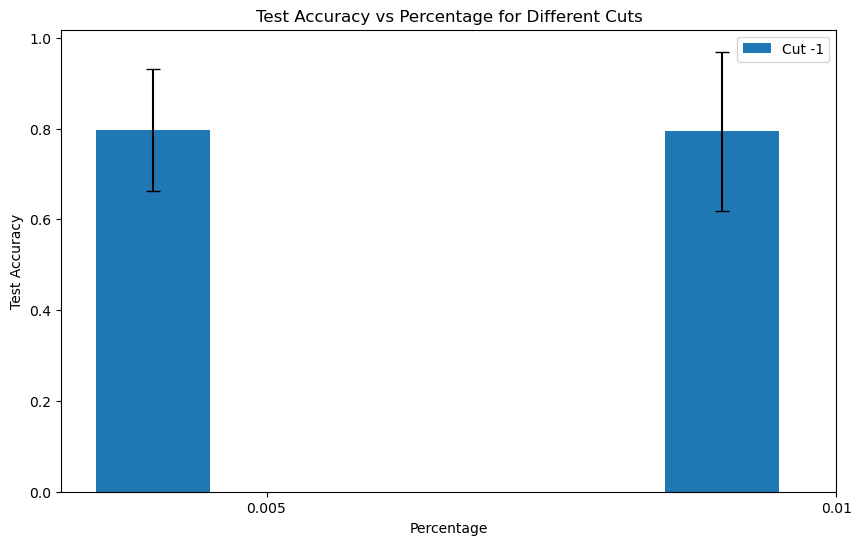

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Group by 'Percentage' and 'Cut Point' and calculate mean and std of 'Test Accuracy'
grouped = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].agg(['mean', 'std']).reset_index()

# Set figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for each 'Cut Point'
#colors = ['blue', 'green', 'red', 'cyan']

# Set positions of the bars
positions = np.arange(len(grouped['Percentage'].unique()))

# Width of each bar
bar_width = 0.2

# Loop through each 'Cut Point'
for i, cut in enumerate(grouped['Cut Point'].unique()):
    # Filter the data for the current 'Cut Point'
    cut_data = grouped[grouped['Cut Point'] == cut]
    
    # Calculate positions for the current 'Cut Point'
    cut_positions = positions + (i * bar_width)
    
    # Plot bars
    #ax.bar(cut_positions, cut_data['mean'], width=bar_width, color=colors[i], yerr=cut_data['std'], capsize=5, label=f'Cut {cut}')
    ax.bar(cut_positions, cut_data['mean'], width=bar_width, yerr=cut_data['std'], capsize=5, label=f'Cut {cut}')


# Set x-ticks positions and labels
ax.set_xticks(positions + bar_width)
ax.set_xticklabels(grouped['Percentage'].unique())

# Set labels and title
ax.set_xlabel('Percentage')
ax.set_ylabel('Test Accuracy')
ax.set_title('Test Accuracy vs Percentage for Different Cuts')

# Display legend
ax.legend()

# Show plot
plt.show()


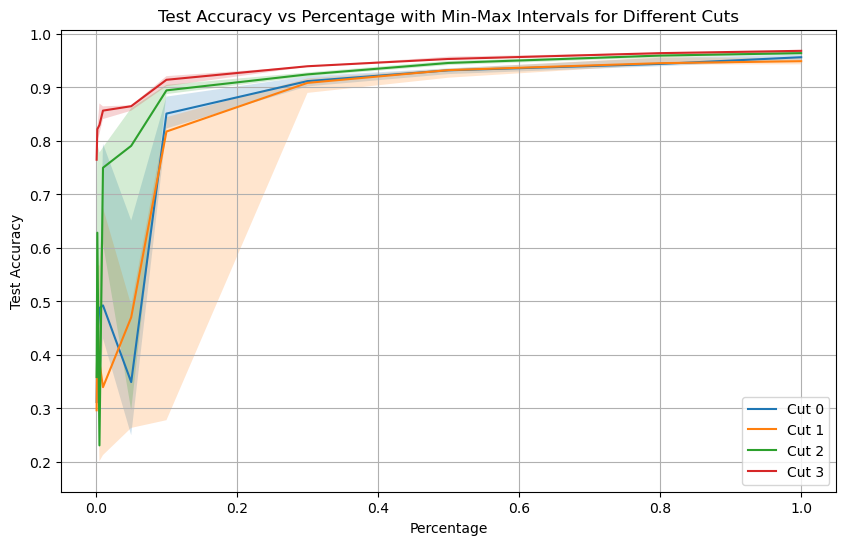

In [26]:
# Adjusting the code to use minimum, maximum, and median values instead of mean and standard deviation

# Calculate median, min, and max for test accuracies
df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')
df['Min Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('min')
df['Max Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('max')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate median, min, and max for each percentage
    medians = cut_df.groupby('Percentage')['Median Test Accuracy'].median()
    mins = cut_df.groupby('Percentage')['Min Test Accuracy'].min()
    maxs = cut_df.groupby('Percentage')['Max Test Accuracy'].max()

    # Plot median values
    plt.plot(medians.index, medians, label=f'Cut {cut_point}')

    # Plot intervals between min and max as shaded areas
    plt.fill_between(medians.index, mins, maxs, alpha=0.2)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage with Min-Max Intervals for Different Cuts')
plt.legend()
plt.grid(True)
plt.show()


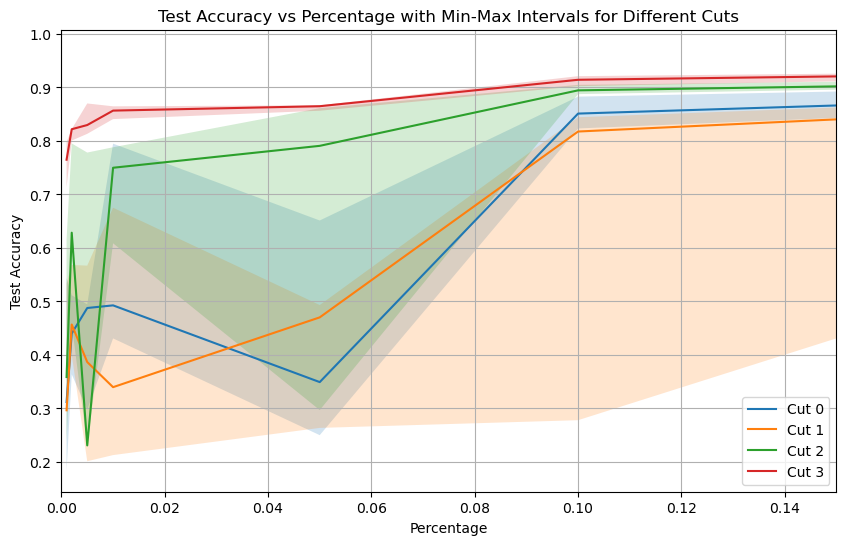

In [27]:
# Adjusting the code to use minimum, maximum, and median values instead of mean and standard deviation

# Calculate median, min, and max for test accuracies
df['Median Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('median')
df['Min Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('min')
df['Max Test Accuracy'] = df.groupby(['Percentage', 'Cut Point'])['Test Accuracy'].transform('max')

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each unique cut point
for cut_point in df['Cut Point'].unique():
    cut_df = df[df['Cut Point'] == cut_point]

    # Calculate median, min, and max for each percentage
    medians = cut_df.groupby('Percentage')['Median Test Accuracy'].median()
    mins = cut_df.groupby('Percentage')['Min Test Accuracy'].min()
    maxs = cut_df.groupby('Percentage')['Max Test Accuracy'].max()

    # Plot median values
    plt.plot(medians.index, medians, label=f'Cut {cut_point}')

    # Plot intervals between min and max as shaded areas
    plt.fill_between(medians.index, mins, maxs, alpha=0.2)

plt.xlabel('Percentage')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Percentage with Min-Max Intervals for Different Cuts')
plt.legend()
plt.grid(True)
#plt.xscale('log')
#x limit to 0.3
plt.xlim(0, 0.15)
plt.show()


In [62]:
conv_indices = [0, 2, 4]
idx = 2
for idx in conv_indices[:idx]:
    print(idx)

print('##################')

for idx in conv_indices[idx:]:
    print(idx)

0
2
##################
4
